<a href="https://colab.research.google.com/github/minat-hub/SCA-Final-Project/blob/main/UsedCarDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###CRAIGSLIST USED CAR DATA
Craigslist has the world's largest collection of used vehicles for sale.
This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.

This data was gotten from kaggle. Here is the link- https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
#getting datasets from kaggle
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 99% 259M/262M [00:02<00:00, 131MB/s]
100% 262M/262M [00:02<00:00, 133MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  craigslist-carstrucks-data.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: vehicles.csv            


In [ ]:
#Installing one of the algorithms needed for the project
!pip install catboost

     |████████████████████████████████| 67.3MB 40kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor
%matplotlib inline
#importing necessary libaries

###GETTING TO KNOW THE DATA

In [ ]:
df = pd.read_csv('vehicles.csv')
df
#reading dataset into pandas

id  ...              posting_date
0       7222695916  ...                       NaN
1       7218891961  ...                       NaN
2       7221797935  ...                       NaN
3       7222270760  ...                       NaN
4       7210384030  ...                       NaN
...            ...  ...                       ...
426875  7301591192  ...  2021-04-04T03:21:31-0600
426876  7301591187  ...  2021-04-04T03:21:29-0600
426877  7301591147  ...  2021-04-04T03:21:17-0600
426878  7301591140  ...  2021-04-04T03:21:11-0600
426879  7301591129  ...  2021-04-04T03:21:07-0600

[426880 rows x 26 columns]

In [ ]:
df.info()
#information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
df.describe()
#getting the statistics of the numerical columns in the dataset

id         price  ...            lat           long
count  4.268800e+05  4.268800e+05  ...  420331.000000  420331.000000
mean   7.311487e+09  7.519903e+04  ...      38.493940     -94.748599
std    4.473170e+06  1.218228e+07  ...       5.841533      18.365462
min    7.207408e+09  0.000000e+00  ...     -84.122245    -159.827728
25%    7.308143e+09  5.900000e+03  ...      34.601900    -111.939847
50%    7.312621e+09  1.395000e+04  ...      39.150100     -88.432600
75%    7.315254e+09  2.648575e+04  ...      42.398900     -80.832039
max    7.317101e+09  3.736929e+09  ...      82.390818     173.885502

[8 rows x 7 columns]

In [ ]:
df.shape
#number of rows and columns present in the dataset

(426880, 26)

In [ ]:
df.isnull().sum()
#null values(missing rows) in the dataset

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

One thing we should pay attention to is the fact that this dataset has a lot of missing rows. These missing rows are up to half of our dataset, dropping them would give us less data to work with and in data science, the more the data, the better the algorithm. So what can we do?

In [ ]:
r = df.columns
for i in r:
    print(df[i].value_counts())

#details of each column in the dataset
#this counts the number of unique values present in a column

7312775165    1
7310416174    1
7316392516    1
7311147589    1
7307281658    1
             ..
7316642868    1
7304055862    1
7311393847    1
7314270665    1
7314872323    1
Name: id, Length: 426880, dtype: int64
https://norfolk.craigslist.org/ctd/d/chesapeake-2020-acura-rdx-advance-pkg/7303809594.html         1
https://cleveland.craigslist.org/ctd/d/cleveland-2018-ram-1500-quad-cab/7312273791.html            1
https://tampa.craigslist.org/hil/ctd/d/tampa-2019-lexus-nx-300-nx-300-skuk/7314861086.html         1
https://erie.craigslist.org/ctd/d/cleveland-2007-ford-focus-zx5/7312698768.html                    1
https://austin.craigslist.org/ctd/d/austin-2018-ram-1500-quad-cab-big-horn/7314768879.html         1
                                                                                                  ..
https://chicago.craigslist.org/chc/ctd/d/crest-hill-2007-cadillac-dts/7315402525.html              1
https://eastoregon.craigslist.org/ctd/d/pasco-2016-ford-150-xlt-fx4-4x4/731060

###Metadata of Our Data
**ID**— Unique ID given to every ad and is the primary key to the data set.

**Price**— Price is given in US dollar and has not been adjusted for inflation.

**Year** — The year in which the car was manufactured

**Manufacturer** — with 43 unique businesses engaged in the manufacture of automobiles.

**Model** — The exact model of the car. Like sierra classic 2500hd.

**Condition** — The condition of the car; excellent, good, fair, like new, salvage, new.

**Cylinders** — The number of cylinders in the car engine ranging from 3 to 12. Also has the ‘other’ category too.

**Fuel** — There were five types of fuel, ‘diesel’, ‘gas’, ‘electric’, ‘hybrid’ and ‘other’.

**Odometer** — This is the distance that the car has traveled after it being bought.

**Status** — The cars also had 6 types of statues; ‘clean’, ‘lien’, ‘rebuilt’, ‘salvage’ , ‘parts only’ and ‘missing’.

**Transmission** - There are 3 types of transmission; 'automatic', manual and other.

**Vin** - Vehicle identification number

**Drive** — There are 3 types of drive transmissions; ‘4WD, ‘FWD’ and ‘RWD’. (Four wheel drive, forward wheel drive and rear wheel drive.)

**Type** — This feature identifies if a vehicle is a SUV or a mini-van. There 13 unique values in this feature.

**State** — The state is political territory and is represented in short form in the data set. Like “fl” is used for the state of Florida.

**Latitude, Longitude** — When both features are combined, they give the location of where the car is being sold at.


●      FWD - cars are commonly equipped with this.

●      RWD - a lot of sports cars, SUVs, and trucks come standard with this.


●      4WD - trucks frequently boast this.

###DATA WRANGLING AND CLEANING

In [ ]:
df = df.drop(columns=['id', 'county','url','region', 'region_url', 'image_url', 'lat', 'size','long'], axis=1)
df.shape
#dropping colums that are not needed for this notebook

(426880, 17)

In [ ]:
df #dataframe

price    year  ... state              posting_date
0        6000     NaN  ...    az                       NaN
1       11900     NaN  ...    ar                       NaN
2       21000     NaN  ...    fl                       NaN
3        1500     NaN  ...    ma                       NaN
4        4900     NaN  ...    nc                       NaN
...       ...     ...  ...   ...                       ...
426875  23590  2019.0  ...    wy  2021-04-04T03:21:31-0600
426876  30590  2020.0  ...    wy  2021-04-04T03:21:29-0600
426877  34990  2020.0  ...    wy  2021-04-04T03:21:17-0600
426878  28990  2018.0  ...    wy  2021-04-04T03:21:11-0600
426879  30590  2019.0  ...    wy  2021-04-04T03:21:07-0600

[426880 rows x 17 columns]

**Observation**
There are 3 unique drives, 13 unique types, 12 paint colors, 3 unique transmissions and 8 unique cylinders.

New columns will be created for description, drive, type, paint_color 

In [ ]:
#filling forward missing values in title_status, posting_date and state columns
df['title_status']= df['title_status'].fillna(method='ffill')
df['posting_date'] = df['posting_date'].fillna(method='ffill')
df['state'] = df['state'].fillna(method='ffill')

The interesting about this data is that some of the missing values in some columns were present in the description column. A particular row might have missing value for the type column but the type of the car can be described in the description column of that row.

# **Filling up columns with the highest numbers of missing values:'drive', 'type' and 'paint_color' from the description column**:

In [ ]:
#Converting strings within the description column to lower case and a new description column is created

df['new_description'] = df['description'].astype(str).apply(lambda x: x.lower())

df['new_description']

0                                                       nan
1                                                       nan
2                                                       nan
3                                                       nan
4                                                       nan
                                ...                        
426875    carvana is the safer way to buy a car during t...
426876    carvana is the safer way to buy a car during t...
426877    carvana is the safer way to buy a car during t...
426878    carvana is the safer way to buy a car during t...
426879    carvana is the safer way to buy a car during t...
Name: new_description, Length: 426880, dtype: object

In [ ]:
#Creating a new column for drive by searching for occurrences of the 3 drive types within the description column


df['newdrive'] = df.new_description.str.findall('(4wd|fwd|rwd)')

df['newdrive'] = df['newdrive'].apply(', '.join)

#if drive is NAN, replace with the value in 'new_drive'
df.loc[df['drive'].isnull(), 'drive'] =  df['newdrive']

The code above looks for the strings that are either 4wd or fwd or rwd, Then put the values in newdrive column.

In [ ]:
df[df['drive'] == ''].sum 

<bound method DataFrame.sum of         price  ...  newdrive
0        6000  ...          
1       11900  ...          
2       21000  ...          
3        1500  ...          
4        4900  ...          
...       ...  ...       ...
426856   5477  ...          
426861  30990  ...          
426862  27590  ...          
426871  17990  ...          
426877  34990  ...          

[102109 rows x 19 columns]>

**Observation**

A TOTAL OF 102109 ROWS ARE STILL MISSING. 

HOWEVER, THAT IMPLIES THERE ARE ADDITIONAL 28458 VALID ROWS ADDED TO THE     'drive'  COLUMN FROM THE 130567 ROWS THAT WERE PREVIOUSLY NAN

In [ ]:
df.drop_duplicates()
#dropping duplicate values in our dataset

price  ...  newdrive
0        6000  ...          
1       11900  ...          
2       21000  ...          
3        1500  ...          
4        4900  ...          
...       ...  ...       ...
426875  23590  ...       fwd
426876  30590  ...       fwd
426877  34990  ...          
426878  28990  ...       fwd
426879  30590  ...       rwd

[426840 rows x 19 columns]

Looking for the unique values of type in the description column.

In [ ]:
#excluding 'other'
df['new_type'] = df.new_description.str.findall('(suv|bus|convertible|coupe|hatchback|mini-van|offroad|pickup|sedan|truck|van|wagon)').apply(', '.join)

df.loc[df['type'].isnull(), 'type'] =  df['new_type']

In [ ]:
df[['type','new_type']]

type                                           new_type
0                                                                   
1                                                                   
2                                                                   
3                                                                   
4                                                                   
...           ...                                                ...
426875      sedan  van, van, van, van, van, van, van, van, bus, v...
426876      sedan  van, van, van, van, van, van, van, van, bus, v...
426877  hatchback  van, van, van, van, van, van, van, van, van, v...
426878      sedan  van, van, van, van, van, van, van, van, bus, v...
426879      coupe  van, van, van, van, van, van, van, van, van, v...

[426880 rows x 2 columns]

In [ ]:
df[df['type'] == ''].sum

<bound method DataFrame.sum of         price    year  ... newdrive new_type
0        6000     NaN  ...                  
1       11900     NaN  ...                  
2       21000     NaN  ...                  
3        1500     NaN  ...                  
4        4900     NaN  ...                  
...       ...     ...  ...      ...      ...
426789  11000  2017.0  ...                  
426812      0  2006.0  ...      fwd         
426813   1000  1998.0  ...                  
426832      0  2004.0  ...      fwd         
426868      0  2010.0  ...      4wd         

[41992 rows x 20 columns]>

Observation

A TOTAL OF 41,992 ROWS ARE STILL EMPTY

HOWEVER, A TOTAL OF 50,866 ROWS HAVE BEEN FILLED. ALTHOUGH SOME OF THE ROWS MIGHT STILL BE DROPPED OR CLEANED SINCE THEY HAVE MULTIPLE ENTRIES.

Looking for unique values of paint color in the description column

In [ ]:

df['new_paint_color'] = df.new_description.str.findall('(black|blue|brown|custom|green|grey|orange|purple|red|silver|white|yellow|gray)').apply(', '.join)

df.loc[df['paint_color'].isnull(), 'paint_color'] =  df['new_paint_color']

In [ ]:
df[df['paint_color'] == ''].sum

<bound method DataFrame.sum of         price    year  ...                   new_type new_paint_color
0        6000     NaN  ...                                           
1       11900     NaN  ...                                           
2       21000     NaN  ...                                           
3        1500     NaN  ...                                           
4        4900     NaN  ...                                           
...       ...     ...  ...                        ...             ...
426840  65999  2017.0  ...  truck, pickup, sedan, suv                
426841  16999  2014.0  ...  truck, pickup, sedan, suv                
426842  22999  2013.0  ...  truck, pickup, sedan, suv                
426843  21999  2017.0  ...  truck, pickup, sedan, suv                
426846  41999  2015.0  ...  truck, pickup, sedan, suv                

[29690 rows x 21 columns]>

Observation

A TOTAL OF 29,690 ROWS ARE STILL EMPTY

HOWEVER, A TOTAL OF 100,513 ROWS HAVE BEEN FILLED. ALTHOUGH SOME OF THE ROWS STILL NEEDS TO BE DROPPED OR CLEANED SINCE THERE ARE MULTIPLE ENTRIES.

In [ ]:
#Drop all new columns
#Drop all columns worked on that have more than one entry

df = df.drop(columns=['new_description','newdrive','new_type','new_paint_color'])
new_df = df[df['paint_color'].str.split().str.len()<2]
new_df = new_df[new_df['type'].str.split().str.len()<2]
new_df = new_df[new_df['drive'].str.split().str.len()<2]
new_df = new_df[new_df['drive'].str.split().str.len()<3]

new_df = new_df. replace(r'^\s*$', np. nan, regex=True)

In [ ]:
new_df['condition']= new_df['condition'].fillna(method='ffill')
#filling forward empty condition rows

In [ ]:
#filling forward the remaining empty rows in drive, type and paint_color
new_df['drive'] = new_df['drive'].fillna(method='ffill')
new_df['type'] = new_df['type'].fillna(method='ffill')
new_df['paint_color']=new_df['paint_color'].fillna(method='ffill')

In [ ]:
new_df.isnull().sum()

price                0
year              1020
manufacturer     13315
model             3535
condition           27
cylinders       112814
fuel              1808
odometer          2273
title_status        27
transmission      1394
VIN             128594
drive               30
type                27
paint_color         27
description         70
state                0
posting_date        27
dtype: int64

In [ ]:
dat = new_df.fillna(value = {'year': 'Null', 'region': 'Null','price':'Null', 'manufacturer':'Null','model':'Null',	'condition': 'Null', 'cylinders':'Null'	, 'fuel' : 'Null', 'odometer':'Null', 'title_status':'Null', 'transmission': 'Null', 'VIN':'Null', 'drive':'Null',	'type':'Null',	'paint_color':'Null', 'description':'Null',	'posting_date':'Null' })
dat.head()
#filling empty rows with the string null so as to make it easy for me to locate them

price  year manufacturer model  ... paint_color description state posting_date
0   6000  Null         Null  Null  ...        Null        Null    az         Null
1  11900  Null         Null  Null  ...        Null        Null    ar         Null
2  21000  Null         Null  Null  ...        Null        Null    fl         Null
3   1500  Null         Null  Null  ...        Null        Null    ma         Null
4   4900  Null         Null  Null  ...        Null        Null    nc         Null

[5 rows x 17 columns]

In [ ]:
#getting rows that have null for most of their columns
yat =dat[(dat.year == 'Null') & (dat.fuel == 'Null') & (dat.manufacturer == 'Null') & (dat.model == 'Null') & (dat.condition == 'Null')]
pd.set_option('display.max_rows', None)
yat

price  year manufacturer model  ... paint_color description state posting_date
0    6000  Null         Null  Null  ...        Null        Null    az         Null
1   11900  Null         Null  Null  ...        Null        Null    ar         Null
2   21000  Null         Null  Null  ...        Null        Null    fl         Null
3    1500  Null         Null  Null  ...        Null        Null    ma         Null
4    4900  Null         Null  Null  ...        Null        Null    nc         Null
5    1600  Null         Null  Null  ...        Null        Null    ny         Null
6    1000  Null         Null  Null  ...        Null        Null    ny         Null
7   15995  Null         Null  Null  ...        Null        Null    ny         Null
8    5000  Null         Null  Null  ...        Null        Null    or         Null
9    3000  Null         Null  Null  ...        Null        Null    pa         Null
10      0  Null         Null  Null  ...        Null        Null    tx         Null
11      0  Null         Null  Null  ...        Null        Null    tx         Null
12      0  Null         Null  Null  ...        Null        Null    tx         Null
13      0  Null         Null  Null  ...        Null        Null    tx         Null
14      0  Null         Null  Null  ...        Null        Null    tx         Null
15  13995  Null         Null  Null  ...        Null        Null    wa         Null
16  24999  Null         Null  Null  ...        Null        Null    wa         Null
17  21850  Null         Null  Null  ...        Null        Null    wa         Null
18  26850  Null         Null  Null  ...        Null        Null    wa         Null
19  11999  Null         Null  Null  ...        Null        Null    wa         Null
20  24999  Null         Null  Null  ...        Null        Null    wa         Null
21  21850  Null         Null  Null  ...        Null        Null    wa         Null
22  26850  Null         Null  Null  ...        Null        Null    wa         Null
23  11999  Null         Null  Null  ...        Null        Null    wa         Null
24  24999  Null         Null  Null  ...        Null        Null    wa         Null
25  21850  Null         Null  Null  ...        Null        Null    wa         Null
26    500  Null         Null  Null  ...        Null        Null    wi         Null

[27 rows x 17 columns]

In [ ]:
#dropping the rows outputed above
updt = dat.drop([dat.index[0], dat.index[1], dat.index[2],      dat.index[3],      dat.index[4],      dat.index[5],      dat.index[6], dat.index[7],
                 dat.index[8],      dat.index[9],     dat.index[10],     dat.index[11],     dat.index[12],     dat.index[13],     dat.index[14],     dat.index[15],
                dat.index[16],     dat.index[17],     dat.index[18],     dat.index[19],     dat.index[20],     dat.index[21],     dat.index[22],     dat.index[23],
                dat.index[24],     dat.index[25],     dat.index[26],  dat.index[30184],  dat.index[33948],  dat.index[63236],  dat.index[70037],  dat.index[72478],
             dat.index[80766],  dat.index[80767],  dat.index[80768],  dat.index[80769],  dat.index[83032],  dat.index[94693], dat.index[118854], dat.index[121392],
            dat.index[144406], dat.index[144572], dat.index[159273], dat.index[172776], dat.index[175630], dat.index[196288], dat.index[197407], dat.index[197408],
            dat.index[214184], dat.index[231771], dat.index[267108], dat.index[268255], dat.index[275017], dat.index[283644], dat.index[283884], dat.index[295053],
            dat.index[295054], dat.index[295055], dat.index[295056], dat.index[295057], dat.index[295058], #dat.index[331001], dat.index[332728], dat.index[368797],
            #dat.index[372596], dat.index[375886], dat.index[402274], dat.index[410619
                                                                               ])
updt.head(2)


price  year  ... state              posting_date
27  33590  2014  ...    al  2021-05-04T12:31:18-0500
28  22590  2010  ...    al  2021-05-04T12:31:08-0500

[2 rows x 17 columns]

In [ ]:
pn=updt[(updt.year== 'Null')]#getting year rows with null values
pn

price  year  ... state              posting_date
194      33990  Null  ...    al  2021-05-04T10:11:04-0500
350      35495  Null  ...    al  2021-05-01T04:40:22-0500
578      32995  Null  ...    al  2021-04-27T10:10:59-0500
678      29890  Null  ...    al  2021-04-25T04:40:35-0500
710      26495  Null  ...    al  2021-04-24T10:01:21-0500
731      29875  Null  ...    al  2021-04-24T04:40:50-0500
863      49895  Null  ...    al  2021-04-23T10:11:39-0500
919      45990  Null  ...    al  2021-04-22T10:12:01-0500
964      36990  Null  ...    al  2021-04-21T10:11:29-0500
998      28990  Null  ...    al  2021-04-20T10:10:51-0500
1092     35495  Null  ...    al  2021-04-18T10:01:04-0500
1118     36900  Null  ...    al  2021-04-17T15:45:42-0500
1182     35990  Null  ...    al  2021-04-16T10:11:42-0500
1221     64900  Null  ...    al  2021-04-15T10:43:09-0500
1233     48990  Null  ...    al  2021-04-15T04:50:31-0500
1506     53700  Null  ...    al  2021-04-10T10:40:57-0500
1527     50980  Null  ...    al  2021-04-09T12:32:49-0500
1553     29890  Null  ...    al  2021-04-09T04:50:42-0500
1615     26495  Null  ...    al  2021-04-08T04:50:50-0500
1679     36990  Null  ...    al  2021-04-07T04:51:03-0500
1761     28990  Null  ...    al  2021-04-05T10:11:36-0500
2236     36900  Null  ...    al  2021-04-17T15:46:04-0500
2245     64900  Null  ...    al  2021-04-15T10:44:12-0500
2266     53700  Null  ...    al  2021-04-10T10:42:03-0500
2272     50980  Null  ...    al  2021-04-09T12:33:27-0500
2530     33990  Null  ...    al  2021-05-04T10:11:16-0500
2681     71989  Null  ...    al  2021-05-01T13:12:16-0500
2708     35495  Null  ...    al  2021-05-01T04:50:32-0500
2746     71989  Null  ...    al  2021-04-30T14:11:15-0500
2911     65989  Null  ...    al  2021-04-27T12:12:40-0500
2920     32995  Null  ...    al  2021-04-27T10:11:11-0500
3008     29890  Null  ...    al  2021-04-25T04:50:46-0500
3033     26495  Null  ...    al  2021-04-24T10:11:13-0500
3044     29875  Null  ...    al  2021-04-24T04:50:56-0500
3099     49895  Null  ...    al  2021-04-23T10:11:49-0500
3150     45990  Null  ...    al  2021-04-22T10:12:12-0500
3204     36990  Null  ...    al  2021-04-21T10:11:49-0500
3235     23989  Null  ...    al  2021-04-20T14:10:38-0500
3256     28990  Null  ...    al  2021-04-20T10:11:01-0500
3310     71989  Null  ...    al  2021-04-18T12:11:54-0500
3320     35495  Null  ...    al  2021-04-18T10:11:53-0500
3386     35990  Null  ...    al  2021-04-16T10:11:54-0500
3425     48990  Null  ...    al  2021-04-15T04:50:42-0500
3550     43989  Null  ...    al  2021-04-10T13:11:55-0500
3590     33989  Null  ...    al  2021-04-09T14:11:17-0500
3617     29890  Null  ...    al  2021-04-09T04:50:51-0500
3672     26495  Null  ...    al  2021-04-08T04:51:05-0500
3714     36990  Null  ...    al  2021-04-07T04:51:18-0500
3724     23989  Null  ...    al  2021-04-06T13:12:50-0500
3757     28990  Null  ...    al  2021-04-05T10:11:47-0500
4148     36900  Null  ...    al  2021-04-17T15:46:51-0500
4324     53700  Null  ...    al  2021-04-10T10:43:14-0500
4333     50980  Null  ...    al  2021-04-09T12:35:55-0500
4908     36900  Null  ...    al  2021-04-17T15:47:42-0500
4939     53700  Null  ...    al  2021-04-10T10:44:55-0500
4940     53700  Null  ...    al  2021-04-10T10:44:21-0500
4945     50980  Null  ...    al  2021-04-09T12:37:08-0500
4946     50980  Null  ...    al  2021-04-09T12:36:56-0500
9337     14467  Null  ...    az  2021-05-04T12:10:34-0700
9405         0  Null  ...    az  2021-05-01T11:40:33-0700
9428     71703  Null  ...    az  2021-04-30T09:12:35-0700
9487     33871  Null  ...    az  2021-04-27T09:12:09-0700
9524     32469  Null  ...    az  2021-04-25T09:11:54-0700
9527     29871  Null  ...    az  2021-04-24T09:13:18-0700
9533     17941  Null  ...    az  2021-04-23T12:10:31-0700
9534     43473  Null  ...    az  2021-04-23T09:12:48-0700
9585     44871  Null  ...    az  2021-04-20T09:13:34-0700
9599     43431  Null  ...    az  2021-04-19T09:12:07-0700
9636   

To get the null values in the year column from the description column, split the description column then assign it to a new data frame, create a second-year column, and assign it to the first column in the new data frame. Strip the string in the second year column, where there are null values in the original year column replace with values in the second year column. Then drop the second year column. The same thing was done for the manufacturer column.

In [ ]:
new = pn['description'].str.split('*', expand=True)
updt['Year'] = new[0]
updt['Manufacturer'] = new[1]
updt['Year'] = updt['Year'].str.strip()
updt['Manufacturer'] = updt['Manufacturer'].str.strip()
updt['year'] = np.where(updt['year'] == 'Null', updt['Year'], updt['year'])
updt['manufacturer']=np.where(updt['manufacturer'] == 'Null', updt['Manufacturer'], updt['manufacturer'])
updt.drop(['Year'], inplace=True, axis=1)
updt.drop(['Manufacturer'], inplace=True, axis=1)
updt.head()


price  year  ... state              posting_date
27  33590  2014  ...    al  2021-05-04T12:31:18-0500
28  22590  2010  ...    al  2021-05-04T12:31:08-0500
29  39590  2020  ...    al  2021-05-04T12:31:25-0500
30  30990  2017  ...    al  2021-05-04T10:41:31-0500
31  15000  2013  ...    al  2021-05-03T14:02:03-0500

[5 rows x 17 columns]

This is how the new column created looks like.

In [ ]:
new #split description column

0              1    ...                                 195   196
194     2018        Cadillac  ...                                None  None
350     2020             BMW  ...                                None  None
578     2018          Jaguar  ...                                None  None
678     2018         Hyundai  ...                                None  None
710     2018   Mercedes-Benz  ...                                None  None
731     2019          Toyota  ...                                None  None
863     2018         Porsche  ...                                None  None
919     2018   Mercedes-Benz  ...                                None  None
964     2018   Mercedes-Benz  ...                                None  None
998     2019           Mazda  ...                                None  None
1092    2020             BMW  ...                                None  None
1118    2019       Chevrolet  ...             16 FOOT BOX TRUCK DUAL       
1182    2018             Ram  ...                                None  None
1221    2020             Ram  ...  RAM 3500 DUALLY 4X4 CUMMINS DIESEL      
1233    2020            Jeep  ...                                None  None
1506    2020             GMC  ...           SIERRA 1500 AT4 4X4 5.3L       
1527    2019       Chevrolet  ...                                None  None
1553    2018         Hyundai  ...                                None  None
1615    2018   Mercedes-Benz  ...                                None  None
1679    2018   Mercedes-Benz  ...                                None  None
1761    2019           Mazda  ...                                None  None
2236    2019       Chevrolet  ...             16 FOOT BOX TRUCK DUAL       
2245    2020             Ram  ...  RAM 3500 DUALLY 4X4 CUMMINS DIESEL      
2266    2020             GMC  ...           SIERRA 1500 AT4 4X4 5.3L       
2272    2019       Chevrolet  ...                                None  None
2530    2018        Cadillac  ...                                None  None
2681    2019        Cadillac  ...                                None  None
2708    2020             BMW  ...                                None  None
2746    2018      Land Rover  ...                                None  None
2911    2021             GMC  ...                                None  None
2920    2018          Jaguar  ...                                None  None
3008    2018         Hyundai  ...                                None  None
3033    2018   Mercedes-Benz  ...                                None  None
3044    2019          Toyota  ...                                None  None
3099    2018         Porsche  ...                                None  None
3150    2018   Mercedes-Benz  ...                                None  None
3204    2018   Mercedes-Benz  ...                                None  None
3235    2018          Toyota  ...                                None  None
3256    2019           Mazda  ...                                None  None
3310    2018      Land Rover  ...                                None  None
3320    2020             BMW  ...                                None  None
3386    2018             Ram  ...                                None  None
3425    2020            Jeep  ...                                None  None
3550    2018        Cadillac  ...                                None  None
3590    2018         Lincoln  ...                                None  None
3617    2018         Hyundai  ...                                None  None
3672    2018   Mercedes-Benz  ...                                None  None
3714    2018   Mercedes-Benz  ...                                None  None
3724    2018          Toyota  ...                                None  None
3757    2019           Mazda  ...                                None  None
4148    2019       Chevrolet  ...             16 FOOT BOX TRUCK DUAL       
4324    2020             GMC  ...           SIERRA 1500 AT

In [ ]:
updt = updt[updt.year != 'Null']
updt.head()

price  year  ... state              posting_date
27  33590  2014  ...    al  2021-05-04T12:31:18-0500
28  22590  2010  ...    al  2021-05-04T12:31:08-0500
29  39590  2020  ...    al  2021-05-04T12:31:25-0500
30  30990  2017  ...    al  2021-05-04T10:41:31-0500
31  15000  2013  ...    al  2021-05-03T14:02:03-0500

[5 rows x 17 columns]

In [ ]:
updt['year']=updt['year'].astype(int)

In [ ]:
#first word is most important for 'model': many car model categories refer to the same model but are written differently 
#(i.e. 'f150 good condition' and 'F - 150 four wheel drive' refer to the same model: f150)
#=> keep only first word and remove spaces, special characters, uppercase letters, etc.

#delete instances with a model that appears less than 150 times => reduce amount of categories by omitting uncommon types

model_list = updt['model'].tolist()
model_list = map(str, model_list)
model_list = [x.lower().strip() for x in model_list]

In [ ]:

my_list = [car_model.split()[0] for car_model in model_list]
my_list = [x.replace(' ', '').replace('-', '').replace('/', '') for x in my_list]
updt['car_model'] = my_list
updt['car_model'] = updt['manufacturer'] + " " + updt['car_model']


In [ ]:

new_car_models = (updt.groupby(['car_model'], as_index= False).count())[['manufacturer', 'car_model', 'price']]
new_car_models = new_car_models.rename(columns={'price': 'count'})
only_common_models = new_car_models[new_car_models['count'] > 150]

print('total car models: ', len(new_car_models['count']))
print('remaining car models: ', len(only_common_models['count']))
print('decreasing ', round((1-len(only_common_models['count'])/len(new_car_models['count'])) * 100, 2),'% of the number of car models')
print()
print('total instances: ', len(updt['price']))
print('remaining instances: ', sum(only_common_models['count']))
print('removing ', round((1-sum(only_common_models['count'])/len(updt['price'])) * 100, 2),'% of the instances')

total car models:  3349
remaining car models:  291
decreasing  91.31 % of the number of car models

total instances:  318736
remaining instances:  272570
removing  14.48 % of the instances


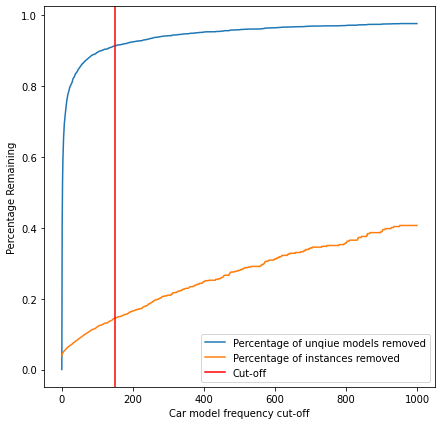

In [ ]:
#14.48% seems like the reasonable choice w.r.t. trade-off reducing categories vs keeping enough data

removed_models_list = []
removed_instances_list = []

for i in range(0,1000):
    only_common_models_v2 = new_car_models[new_car_models['count']>i]
    models_removed = 1-len(only_common_models_v2['count'])/len(new_car_models['count'])
    instances_removed = 1-sum(only_common_models_v2['count'])/len(updt['price'])
    
    removed_models_list.append(models_removed)
    removed_instances_list.append(instances_removed)

fig = plt.figure(figsize=(7,7))
plt.plot(removed_models_list, label = 'Percentage of unqiue models removed')
plt.plot(removed_instances_list, label = 'Percentage of instances removed')
plt.axvline(150 , color = 'red', label = 'Cut-off')
plt.ylabel('Percentage Remaining')
plt.xlabel('Car model frequency cut-off')
plt.legend()

In [ ]:
#committing car model cleaning to original dataframe

updt = updt[updt['car_model'].isin(only_common_models['car_model'].tolist())]
updt.drop('model', axis = 1, inplace = True)
updt.shape

(272570, 17)

In [ ]:
updt.at[396941, 'price'] = '800' #the other price rows with two digits are cars for rent, that is why they have low prices
#but this particular row had 80 as value because 0 was omitted and in the description column the price was 800 and that is why i am replacing it

In [ ]:
# Dropping posting date columns
updt.drop(columns =["posting_date"], inplace = True)

In [ ]:
updt.head()

price  year  ... state            car_model
27  33590  2014  ...    al           gmc sierra
28  22590  2010  ...    al  chevrolet silverado
29  39590  2020  ...    al  chevrolet silverado
30  30990  2017  ...    al        toyota tundra
31  15000  2013  ...    al            ford f150

[5 rows x 16 columns]

The cylinder column is split and the number extracted.

In [ ]:
net2 = updt["cylinders"].str.split(" ", n = 1, expand = True)
updt['cylinders'] = net2[0]

In [ ]:
tr = updt[updt['cylinders'] == 'Null']
tr.tail()

price  year  ... state             car_model
426867  28990  2018  ...    wy             jaguar xe
426870  22990  2020  ...    wy        hyundai sonata
426872  32590  2020  ...    wy  mercedes-benz cclass
426876  30590  2020  ...    wy             volvo s60
426877  34990  2020  ...    wy          cadillac xt4

[5 rows x 16 columns]

Where fuel is electric replace null values in cylinder column with 0

In [ ]:
fh = updt[updt['fuel'] == 'electric']
fh['cylinders']= fh['cylinders'].replace(['Null'], '0')
fh.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


price  year  ... state    car_model
1008  29890  2013  ...    al  tesla model
1333  32990  2013  ...    al  tesla model
1806  29890  2013  ...    al  tesla model
2755  58989  2015  ...    al  tesla model
2901  32990  2013  ...    al  tesla model

[5 rows x 16 columns]

In [ ]:
updt['Cylinders'] = fh['cylinders']
updt['Cylinders'] = updt['Cylinders'].str.strip()
updt['cylinders'] = np.where(updt['cylinders'] == 'Null', updt['Cylinders'], updt['cylinders'])
updt.drop(['Cylinders'], inplace=True, axis=1)

In [ ]:

updt['cylinders'] = updt['cylinders'].fillna(method='ffill')

####Checking for outliers in price and odometer column

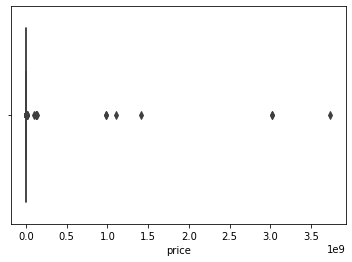

In [ ]:
# boxplot before removing outliers in price column
sns.boxplot(x = updt['price'])

In [ ]:
# removing outliers from the price column using IQR
Q1 = updt['price'].quantile(0.25)
Q3 = updt['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-23985.0 55975.0


In [ ]:
outliers = updt[(updt.price < lower_bound) | (updt.price > upper_bound)]

In [ ]:
# new dataframe with price outliers dropped
df_new = updt.drop(outliers.index)

In [ ]:
gc.collect()

247

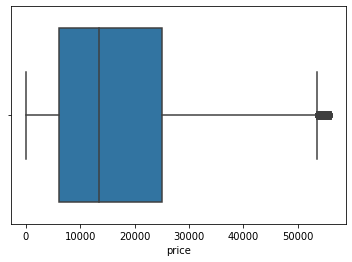

In [ ]:
# boxplot after removing outliers in price column
sns.boxplot(x = df_new['price'])

Getting rid of null rows in the columns below

In [ ]:
df_new = df_new[df_new.odometer != 'Null']
df_new = df_new[df_new.drive != 'Null']
df_new = df_new[df_new.fuel != 'Null']
df_new = df_new[df_new.transmission != 'Null']

Converting odometer column to integer from object type.

In [ ]:
df_new['odometer'] = df_new['odometer'].astype(int)

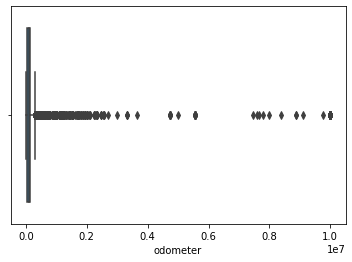

In [ ]:
# boxplot before removing outliers in odometer column
sns.boxplot(x = df_new['odometer'])

In [ ]:
# removing outliers from the odometer column using IQR
Q1 = df_new['odometer'].quantile(0.25)
Q3 = df_new['odometer'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-104216.5 283147.5


In [ ]:
outliers = df_new[(df_new.odometer < lower_bound) | (df_new.odometer > upper_bound)]

In [ ]:
df_new = df_new.drop(outliers.index)

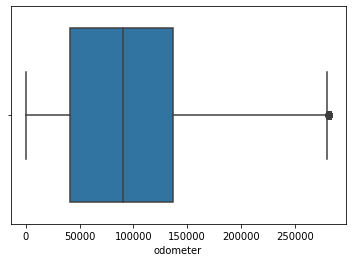

In [ ]:
# boxplot after removing outliers in odometer column
sns.boxplot(x = df_new['odometer'])

Filling the last of the missing rows with the values with high occurrence of each column.

In [ ]:
filled_mode = [ 'drive', 'fuel', 'paint_color',
       'title_status', 'transmission', 'condition'
       ] 
for x in filled_mode:
    df_new[x] = df_new[x].replace(['Null'], df_new[x].mode()[0])

Drop vin and description column.

In [ ]:
df_new.drop(['VIN'], axis=1, inplace=True)
df_new.drop(['description'], axis=1, inplace=True)

###EXPLORATORY DATA ANALYSIS

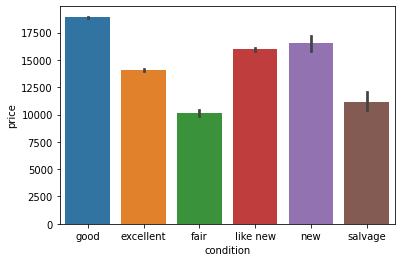

In [ ]:
ax = sns.barplot(x="condition", y="price", data=df_new)

Most cars advertised that were on the high side were in good condition.

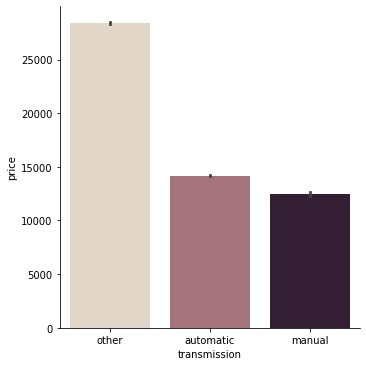

In [ ]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df_new)

While most cars have either automatic transmission or manual and hardly both, Several current performance cars offer dual-clutch transmissions. Among them are the Audi R8, Ford Mustang Shelby GT500, Nissan GT-R, and Porsche 718 and 911. While DCTs are not limited to high-end sports cars but they are more common among them. That is why we are seeing that the most expensive cars have other transmission.

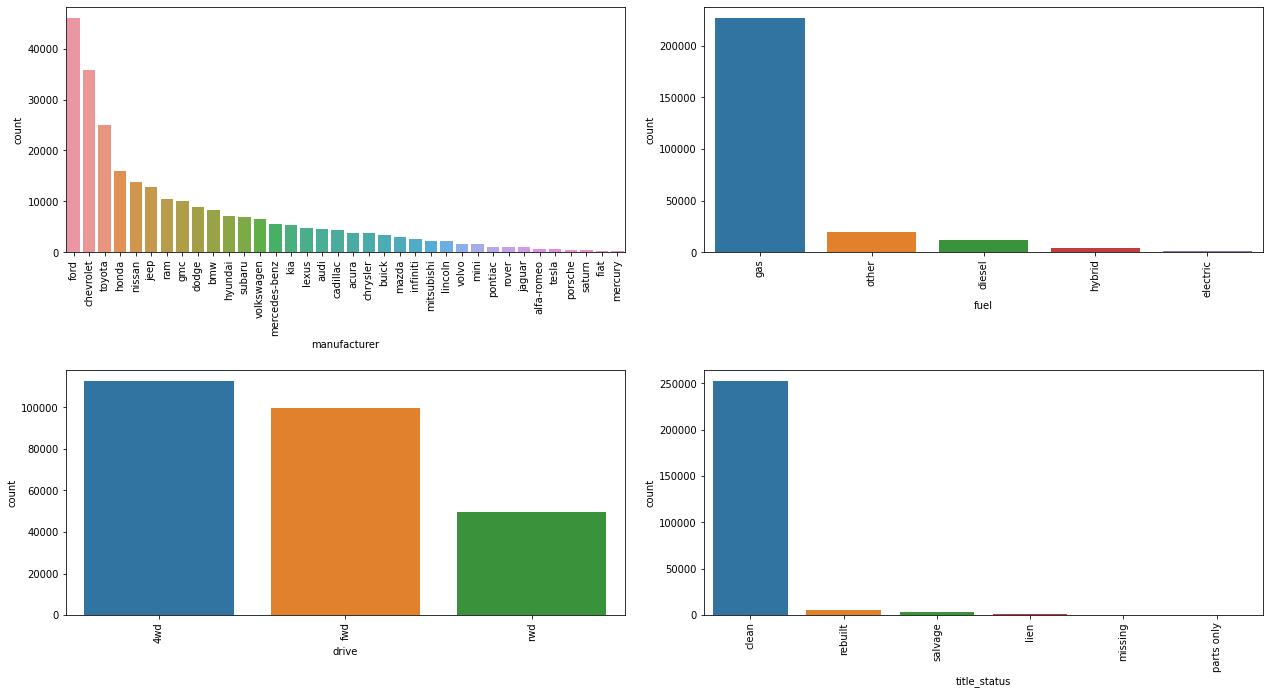

In [ ]:
# DISTRIBUTION OF MANUFACTURER, FUEL, DRIVE, AND TITLE STATUS BASED ON THEIR TOTAL NUMBER 

cat_type = ['manufacturer', 'fuel', 'drive', 'title_status']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10)) 

for i, var in enumerate(cat_type):
    row = i//2
    pos = i % 2    
    plot = sns.countplot(x=var, data=df_new, order = df_new[var].value_counts().index, ax=axs[row][pos])
    var = plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
fig.tight_layout(pad=2.0)

Some conclusion we can see are:

* 3 of top5 car manufacturers are from USA, the other two are from Japan

* Gas dominates in fuel for car in the US. Although gas cars are more popular than diesel in the U.S., diesel engines have nearly half the market share in Europe. So if we were to analyze cars in europe we might be seeing the difference in visualization. Americans haven't been clamoring for diesels because their fuel is so comparatively inexpensive--and diesel engines cost so much more to manufacture. Diesel engines cost more because they require added equipment such as a turbocharger to make power levels close to a gas engine. 
* 4wd and fwd shared almost same number of drive type of car, with four wheel drive dominating.

 London-based automotive business intelligence firm JATO Dynamics recently  published new statistics which reveal that as of April 2020, more than half of new cars sold in the U.S. are equipped with either AWD or 4WD.The findings were published via an infographic, which was posted to the JATO Dynamics Twitter feed. The infographic shows a steady rise in AWD and 4WD new vehicle sales, starting at 39.7 percent in 2016, and topping out at 50.8 percent in 2020. Front-wheel drive vehicles remain in second place, declining from 47.9 percent in 2016, to 40.1 percent in 2020, bottoming out at 38.7 percent in 2019. Rear-wheel drive vehicles remain a distant third, falling from 12.4 percent in 2016, to 9.1 percent in 2020.The proliferation of AWD and 4WD vehicles goes hand in hand with broader automotive industry trends. All-wheel drive and 4WD systems are becoming lighter, more efficient, and less expensive, while enthusiast interest in off-roader-style pickups and utility vehicles, as well as high-performance models requiring enhanced on-road traction, has increased, thus boosting sales of AWD and 4WD vehicles. All this is confirmed by our visualization of drive column.

* Almost all used cars are in clean title_status

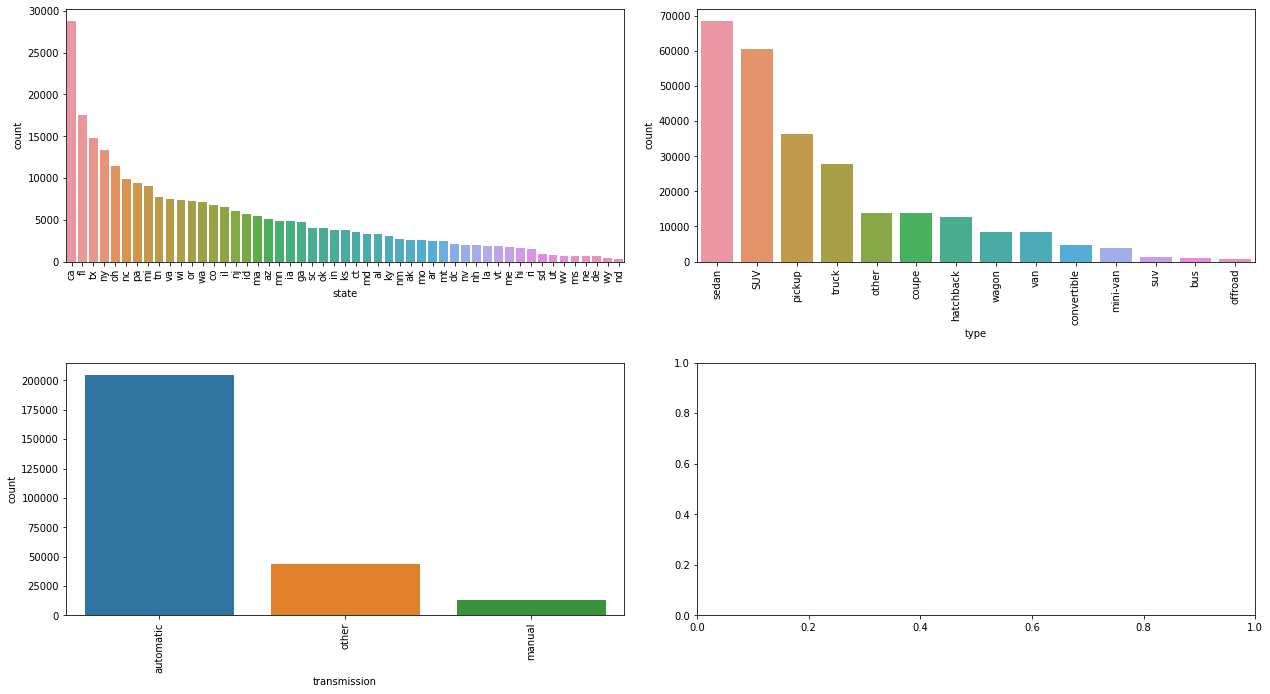

In [ ]:
# DISTRIBUTION OF STATE WITH MOST CARS, TYPE, AND TRANSMISSION 

cat_type2 = ['state', 'type', 'transmission']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10)) 

for i, var in enumerate(cat_type2):
    row = i//2
    pos = i % 2    
    plot = sns.countplot(x=var, data=df_new, order = df_new[var].value_counts().index, ax=axs[row][pos])
    var = plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
fig.tight_layout(pad=2.0)

* California (ca) by far is the state with largest number of car followed by Florida (fl) and this might be because california is the most populous state in the us.
* US citizens love sedan and SUV
* They also like automatic type of car transmission

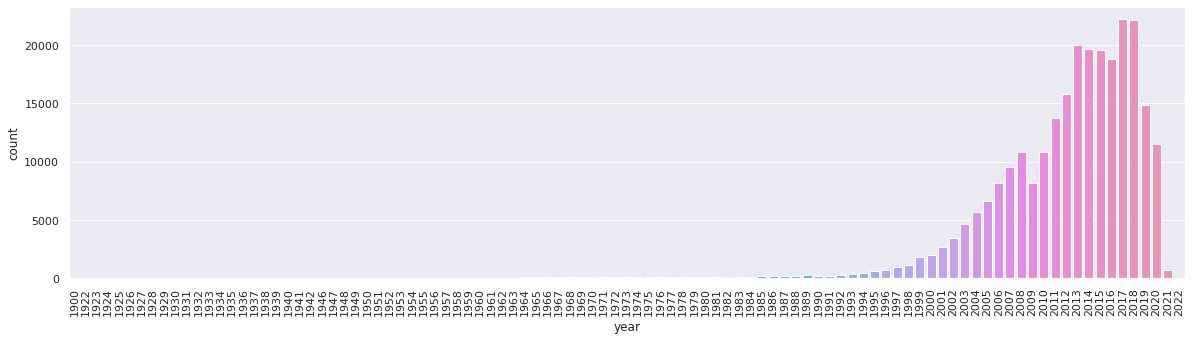

In [ ]:
# YEAR
plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
stat = sns.countplot(x="year", data=df_new)
var = stat.set_xticklabels(stat.get_xticklabels(), rotation=90)

We can see from chart above that 2017 is the year with highest number of used car posted. That number decreased massively in 2020. A decrease in trend in cars available for sale from 2009 show that fewer cars were manufactured in 2009 which can be due to the 2009 financial crisis, the decrease from 2017 onwards can be attributed to temporal proximity to the date the data was collected on. As the cars are already newer users are less likely to sale them ,this is confirmed by the steep decrease from 2018 onwards.

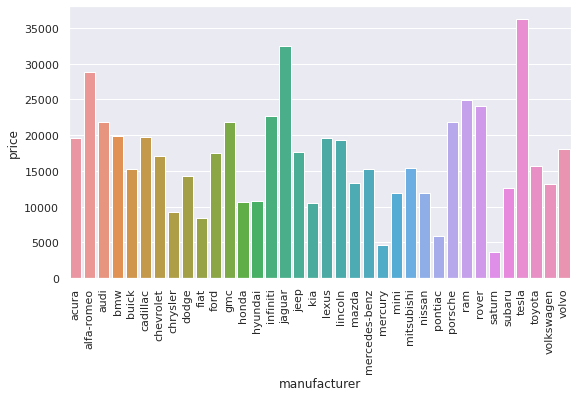

In [ ]:
# PRICE MEAN FOR EACH MANUFACTURER WITH ALL TYPE COMBINED

price_mean = df_new[['price','manufacturer']].groupby('manufacturer').mean()

plt.figure(figsize=(9,5))
pr = sns.barplot(x=price_mean.index, y="price", data=price_mean)
var = pr.set_xticklabels(pr.get_xticklabels(), rotation=90)

If there is possibility you want to re-sell your car in the future, then buy tesla and jaguar. They have the lowest depreciation value. Meaning their mean price of used car is far higher than most of other manufacturer.

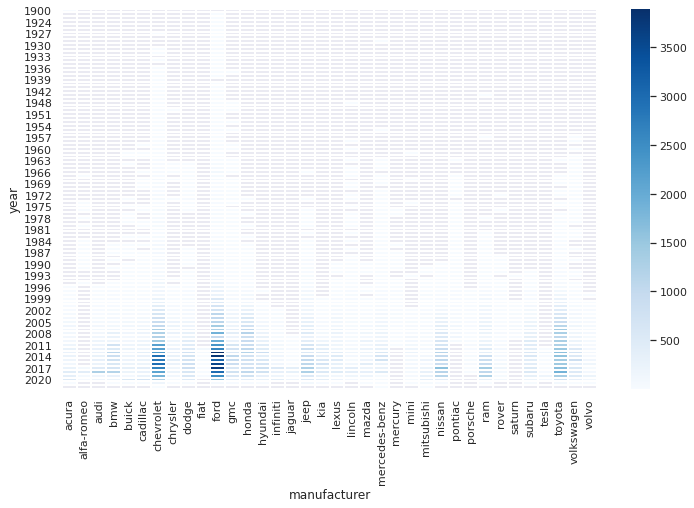

In [ ]:
# MANUFACTURER WITH MOST USED CARS FOR SALE EACH YEAR

manf_ser = df_new.groupby('year').manufacturer.value_counts()
manf_ser_df = pd.DataFrame(manf_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(manf_ser_df, cmap='Blues', linecolor='white', linewidth=1)

Used cars from manufacturers like Ford, Chevrolet, and Toyota dominated for sale, especially in 2012 to 2018. Means car from those manufacturers are loved among US people. This comes as no surprise since Ford’s F-Series line of pickups have been America’s Best Selling Truck for 43 years straight. For the past 38 years, Ford F-Series trucks have also been the Best Selling Vehicle in America. Electric vehicles are relatively new so we clearly see that vehicles manufactured by Tesla are higher in average price compared to other manufacturers . Porsche and Aston Martin are both manufacturers that produce luxurious super cars with premium features so it makes sense for them to have high priced vehicles.

In [ ]:
cols = ['ford', 'chevrolet', 'toyota', 'honda','jeep']
manf_ser_df2 = manf_ser_df[cols].copy()
manf_ser_df2

manufacturer    ford  chevrolet  toyota   honda    jeep
year                                                   
1900             NaN        NaN     NaN     NaN     NaN
1922             1.0        NaN     NaN     NaN     NaN
1923             2.0        NaN     NaN     NaN     NaN
1924             1.0        NaN     NaN     NaN     NaN
1925             2.0        NaN     NaN     NaN     NaN
1926             1.0        NaN     NaN     NaN     NaN
1927             4.0        1.0     NaN     NaN     NaN
1928             4.0        NaN     NaN     NaN     NaN
1929             4.0        NaN     NaN     NaN     NaN
1930             8.0        NaN     NaN     NaN     NaN
1931            18.0        2.0     NaN     NaN     NaN
1932             7.0        2.0     NaN     NaN     NaN
1933             3.0        NaN     NaN     NaN     NaN
1934             4.0        1.0     NaN     NaN     NaN
1935             2.0        NaN     NaN     NaN     NaN
1936             5.0        2.0     NaN     NaN     NaN
1937             6.0        3.0     NaN     NaN     NaN
1938             7.0        9.0     NaN     NaN     NaN
1939             NaN        2.0     NaN     NaN     NaN
1940             7.0        5.0     NaN     NaN     NaN
1941             3.0        8.0     NaN     NaN     NaN
1942             1.0        1.0     NaN     NaN     NaN
1946             8.0        4.0     NaN     NaN     NaN
1947             1.0        2.0     NaN     NaN     NaN
1948             2.0        7.0     NaN     NaN     NaN
1949             1.0        4.0     NaN     NaN     NaN
1950             5.0        3.0     NaN     NaN     NaN
1951             2.0       12.0     NaN     NaN     NaN
1952             1.0        3.0     NaN     NaN     NaN
1953             5.0        8.0     NaN     NaN     NaN
1954             3.0        4.0     NaN     NaN     NaN
1955            21.0       13.0     NaN     NaN     NaN
1956            24.0       15.0     NaN     NaN     NaN
1957             9.0       11.0     NaN     NaN     NaN
1958             1.0        2.0     NaN     NaN     NaN
1959            12.0        5.0     NaN     NaN     NaN
1960            14.0        1.0     NaN     NaN     NaN
1961             6.0        5.0     NaN     NaN     NaN
1962            13.0       15.0     NaN     NaN     NaN
1963            16.0       25.0     6.0     NaN     NaN
1964            41.0       23.0     NaN     NaN     NaN
1965            67.0       21.0     NaN     NaN     NaN
1966           102.0       23.0     NaN     NaN     1.0
1967            38.0       30.0     3.0     NaN     NaN
1968            38.0       52.0     2.0     NaN     NaN
1969            21.0       46.0     3.0     NaN     NaN
1970            22.0       52.0     NaN     NaN     NaN
1971            28.0       30.0     3.0     NaN     NaN
1972            26.0       64.0     2.0     NaN     NaN
1973            32.0       33.0     NaN     1.0     1.0
1974            20.0       29.0     7.0     NaN     NaN
1975            17.0       29.0     1.0     NaN     NaN
1976            18.0       33.0     NaN     NaN     1.0
1977            33.0       37.0     2.0     1.0     2.0
1978            29.0       64.0     4.0     NaN     2.0
1979            39.0       65.0     1.0     NaN     4.0
1980            13.0       41.0     1.0     1.0     1.0
1981            17.0       40.0     1.0     NaN     NaN
1982            11.0       29.0     2.0     NaN     1.0
1983            19.0       32.0     3.0     2.0     NaN
1984            42.0       55.0     6.0     NaN     3.0
1985            35.0       83.0    10.0     6.0     8.0
1986            51.0       75.0     7.0     3.0     7.0
1987            55.0       79.0    12.0     3.0     9.0
1988            70.0       61.0     8.0     1.0    23.0
1989           102.0       67.0    13.0     6.0    49.0
1990            81.0       66.0    12.0     6.0    28.0
1991            51.0       50.0    21.0    12.0    36.0
1992            78.0       62.0    24.0     8.0    28.0
1993           108.0    

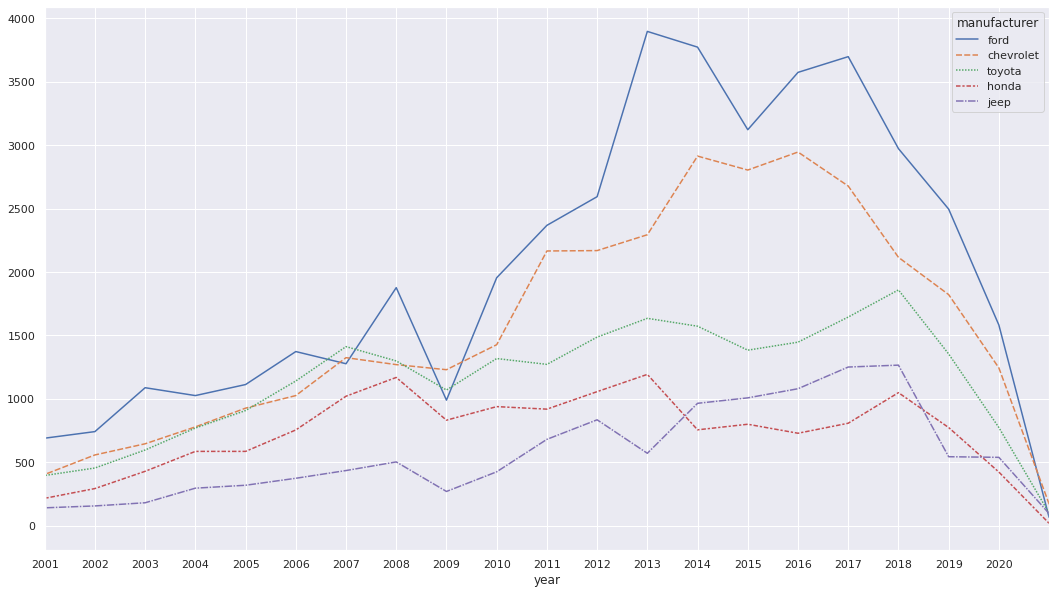

In [ ]:
# TIME SERIES FOR FOR-SALE USED CARS EACH YEAR FROM TOP 5 MANUFACTURERS

fig, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(data=manf_ser_df2)
ax.set_xlim(2001,2021)
ax.set_xticks(range(2001,2021))
plt.show()

They had similar fluctuation of for-sale used cars with Ford was always dominating almost every year.

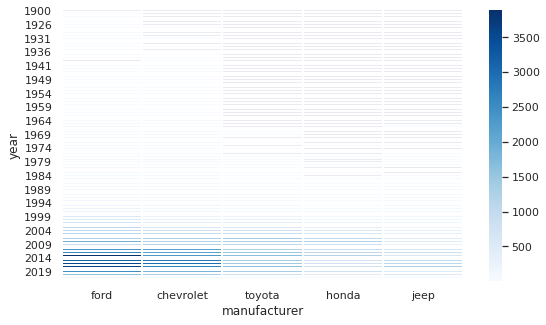

In [ ]:
#heatmap of the values plotted above
plt.subplots(figsize=(9, 5))
sns.heatmap(manf_ser_df2, cmap='Blues', linecolor='white', linewidth=1)

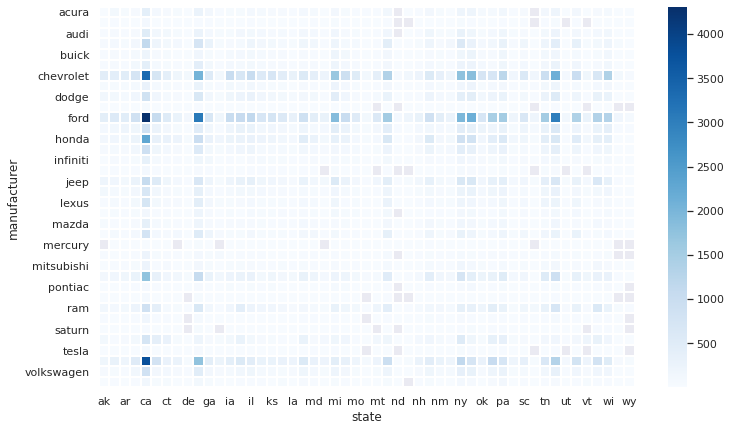

In [ ]:
# DISTRIBUTION OF USED CARS RESOLD IN EVERY STATE FOR TOP 5 MANUFACTURERS

state_ser = df_new.groupby('manufacturer').state.value_counts()
state_ser_df = pd.DataFrame(state_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(state_ser_df, cmap='Blues', linecolor='white', linewidth=1)

The pattern was similar for every state. It always used cars from Ford, Chevrolet, and Toyota the owners wanted to sale

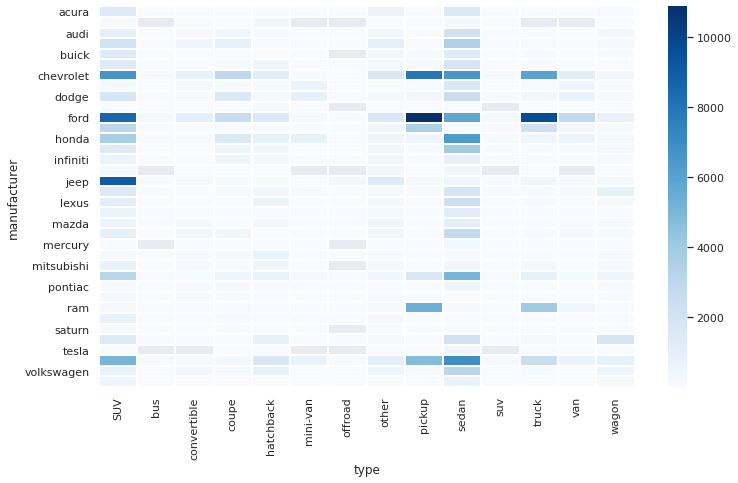

In [ ]:
# WHAT TYPE OF USED CARS WERE FOR SALE?

type_ser = df_new.groupby('manufacturer').type.value_counts()
type_ser_df = pd.DataFrame(type_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(type_ser_df, cmap='Blues', linecolor='white', linewidth=1)

Ford and Chevrolet had SUV, Pickup, Sedan, and Truck. Made-by-Japan used Sedan cars for Toyota and Honda. Many SUV-Jeep owners suprisingly wanted to sell their cars.

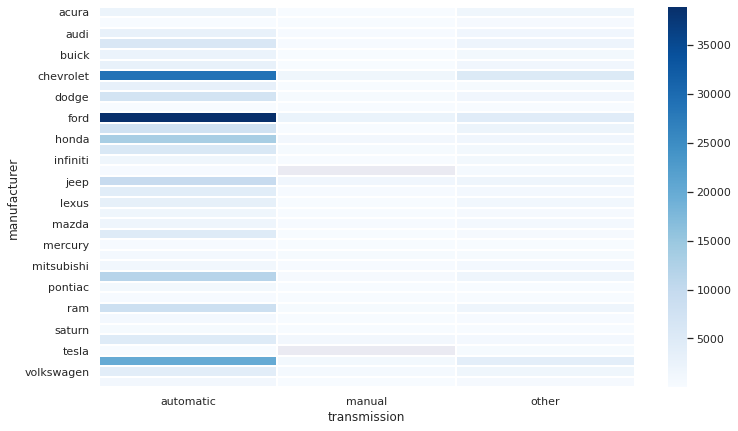

In [ ]:
# TRANSMISSION TYPE

trans_ser = df_new.groupby('manufacturer').transmission.value_counts()
trans_ser_df = pd.DataFrame(trans_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(trans_ser_df, cmap='Blues', linecolor='white', linewidth=1)

It was no surprise that automatic used cars dominated the used cars market.

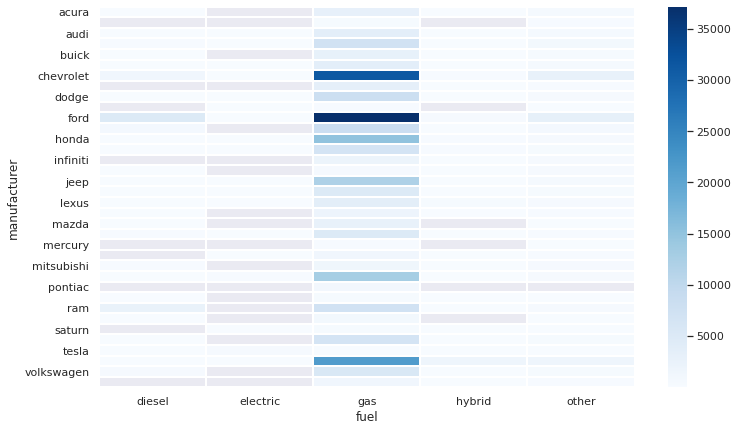

In [ ]:
# FUEL

fuel_ser = df_new.groupby('manufacturer').fuel.value_counts()
fuel_ser_df = pd.DataFrame(fuel_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(fuel_ser_df, cmap='Blues', linecolor='white', linewidth=1)

Same thing with fuel. Gas ruled.

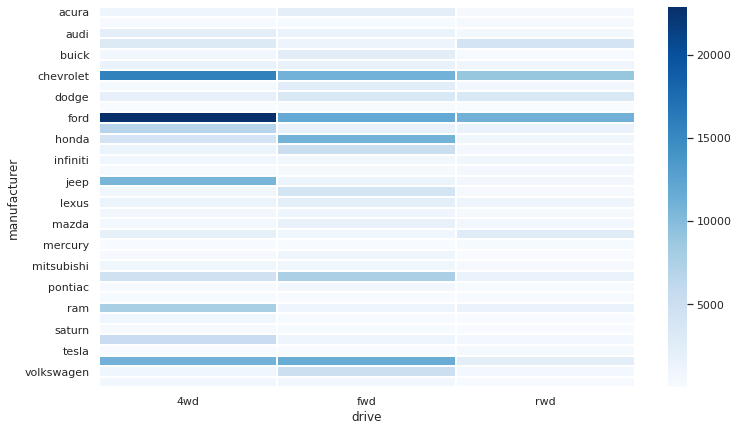

In [ ]:
# DRIVE TYPE

drive_ser = df_new.groupby('manufacturer').drive.value_counts()
drive_ser_df = pd.DataFrame(drive_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(drive_ser_df, cmap='Blues', linecolor='white', linewidth=1)

4wd and fwd drive types were common among the manufacturers

**Price Distribution for each category**

In [ ]:
#price distribution for the year 2017
manf7000 = ['ford', 'chevrolet', 'toyota', 'honda', 'jeep']
to_drop = ['car_model']
vehicles_ca_2017 = df_new.loc[(df_new['manufacturer'].isin(manf7000))&(df_new['state']=='ca')&((df_new['year']==2017)), :].copy()
vehicles_ca_2017.drop(to_drop,inplace=True, axis=1)
vehicles_ca_2017.head(3)

price  year manufacturer  condition  ... drive   type  paint_color state
21251      0  2017        honda  excellent  ...   fwd  sedan       silver    ca
21258      0  2017        honda       good  ...   fwd  sedan        white    ca
21300  36900  2017         jeep   like new  ...   4wd    SUV       silver    ca

[3 rows x 13 columns]

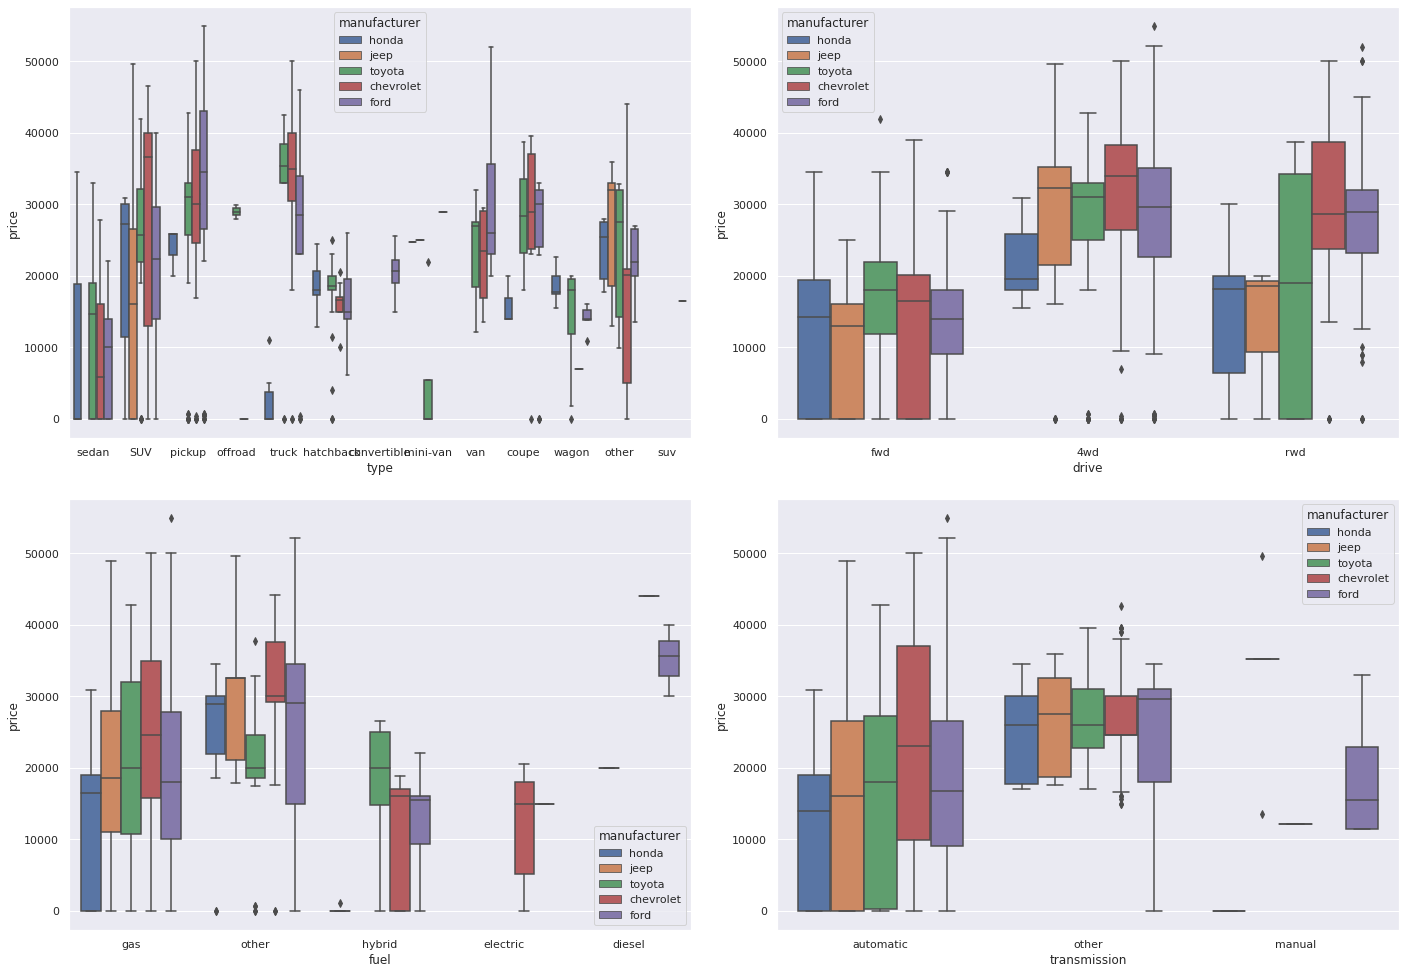

In [ ]:
#visualizing the car specification by price for cars manufactured in 2017
man_type = ['type', 'drive', 'fuel', 'transmission']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 14)) 

for i, var in enumerate(man_type):
    row = i//2
    pos = i % 2   
    plot = sns.boxplot(x=var, y='price', data=vehicles_ca_2017, hue='manufacturer', ax=axs[row][pos])
fig.tight_layout(pad=2.0)  

Ford had the highest price range in almost all categories. Other manufacturers had high price range in some area but absent on the other area. Ford pickups had the highest prices in the first visualization. Also, we can see that 4wd drive have high price range and so does other and automatic.

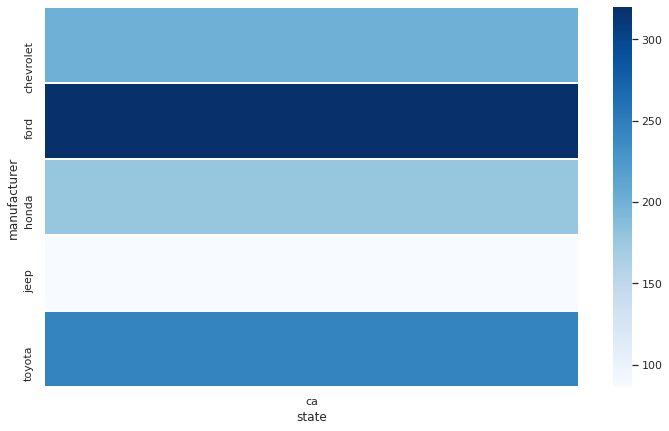

In [ ]:
# USED CARS DISTRIBUTION IN CALIFORNIA IN 2017

state_ser = vehicles_ca_2017.groupby('manufacturer').state.value_counts()
state_ser_df = pd.DataFrame(state_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(state_ser_df, cmap='Blues', linecolor='white', linewidth=1)

It turned out that many people in California have Ford followed by Toyota. Japanese cars are loved by the Americans.

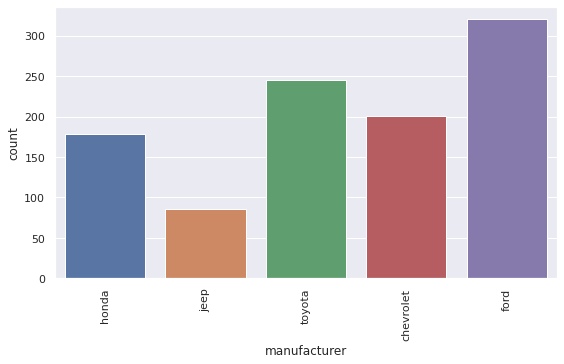

In [ ]:
# TOP 5 MANUFACTURER IN CA STATE IN 2017
plt.figure(figsize=(9,5))
sns.set_theme(style="darkgrid")
stat = sns.countplot(x="manufacturer", data=vehicles_ca_2017)
var = stat.set_xticklabels(stat.get_xticklabels(), rotation=90)

Above is the exact number of for-sale used cars in CA in 2017.


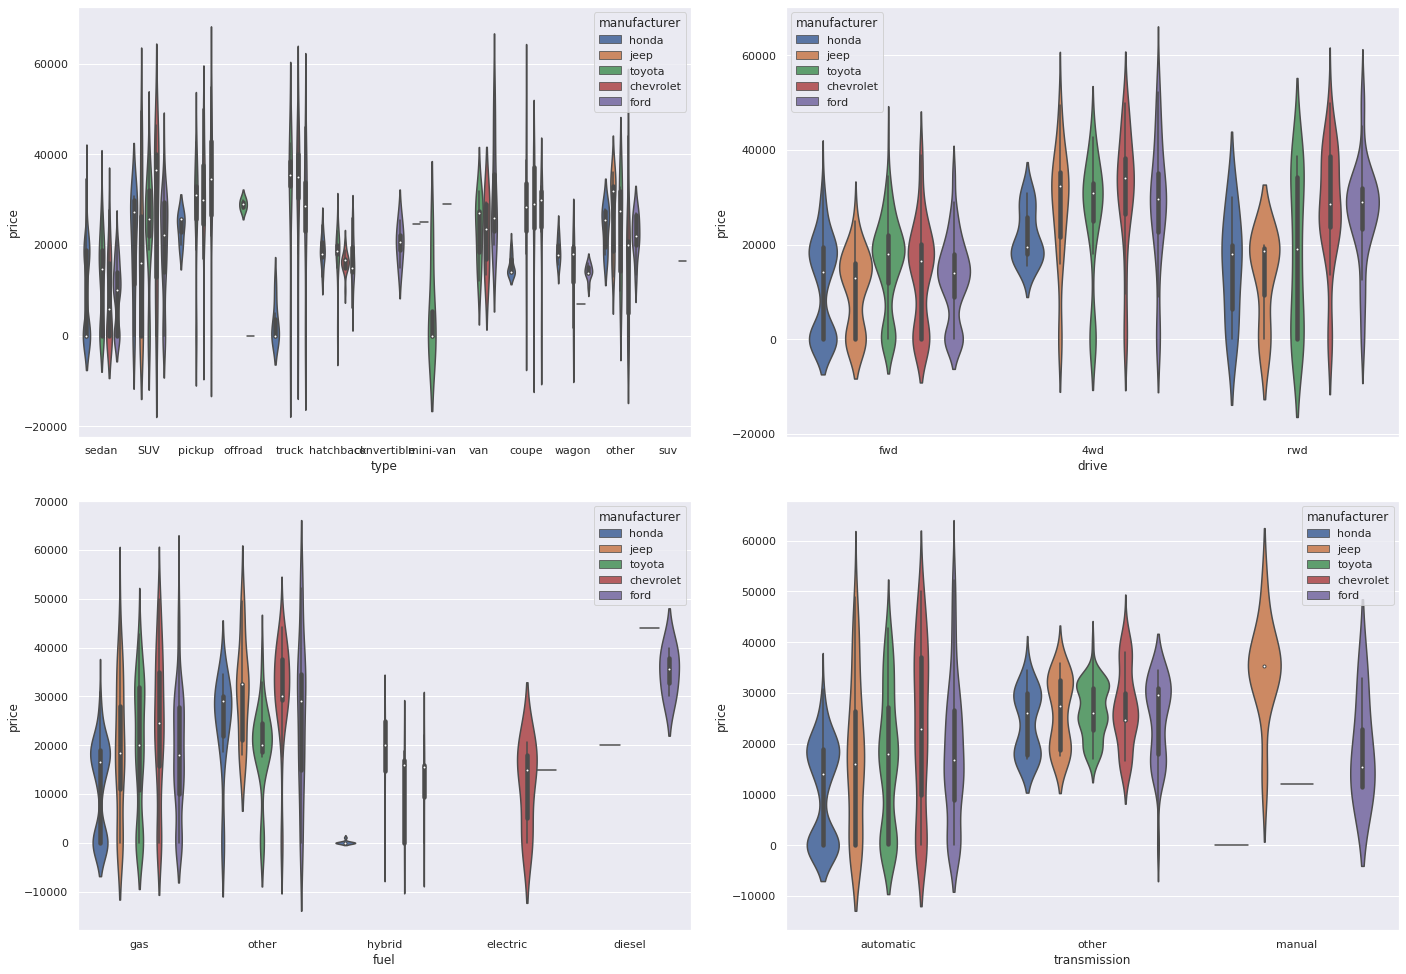

In [ ]:
# PRICE DISTRIBUTION AND TENDENCY OF USED CARS IN CA IN 2017

man_type = ['type', 'drive', 'fuel', 'transmission']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 14)) 

for i, var in enumerate(man_type):
    row = i//2
    pos = i % 2   
    sns.violinplot(x=var, y='price', data=vehicles_ca_2017, hue='manufacturer', ax=axs[row][pos])
fig.tight_layout(pad=2.0)

It is always good for customers to know at what price the used car they want to buy. Charts above displays price tendency for top 5 manufacturers in California in 2017.

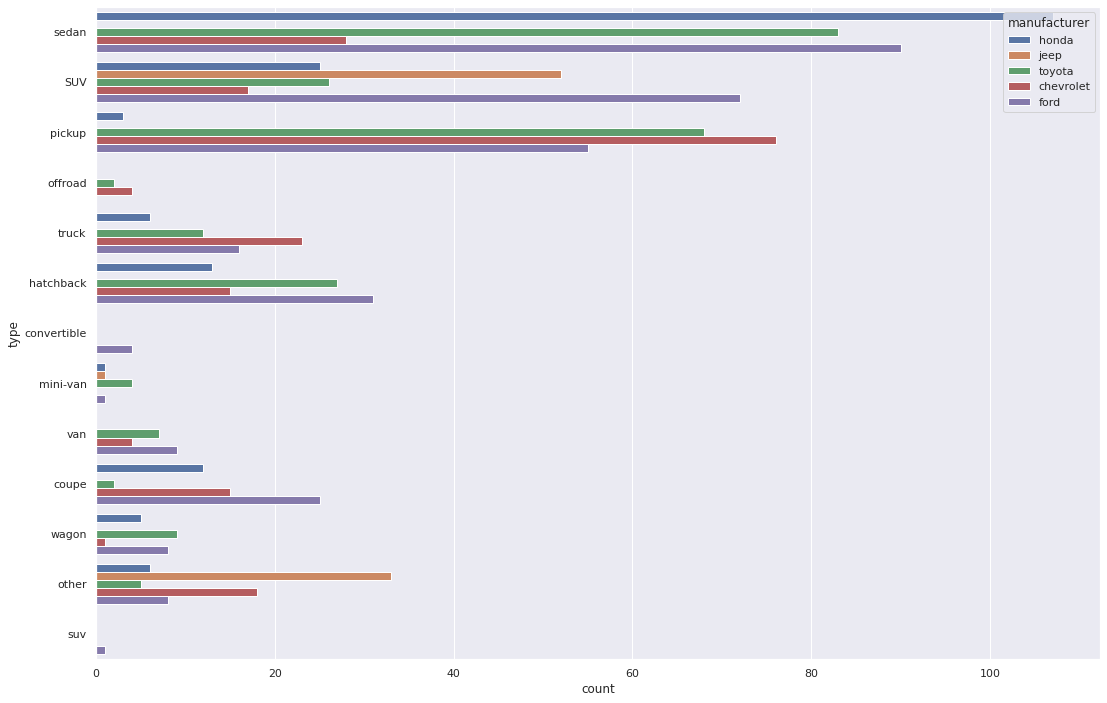

In [ ]:
# 2017, WHAT TYPE OF CARS PEOPLE IN CALIFORNIA WANTED TO SELL 

plt.subplots(figsize=(18, 12)) 
sns.countplot(y="type", hue="manufacturer", data=vehicles_ca_2017)

If you wanted to buy SUV or Pickup, there were many choice coming from Ford. If you wanted Toyota, you would see mostly Sedan. If you want honda, mostly sedans are available and for pickup go for chevrolet. 

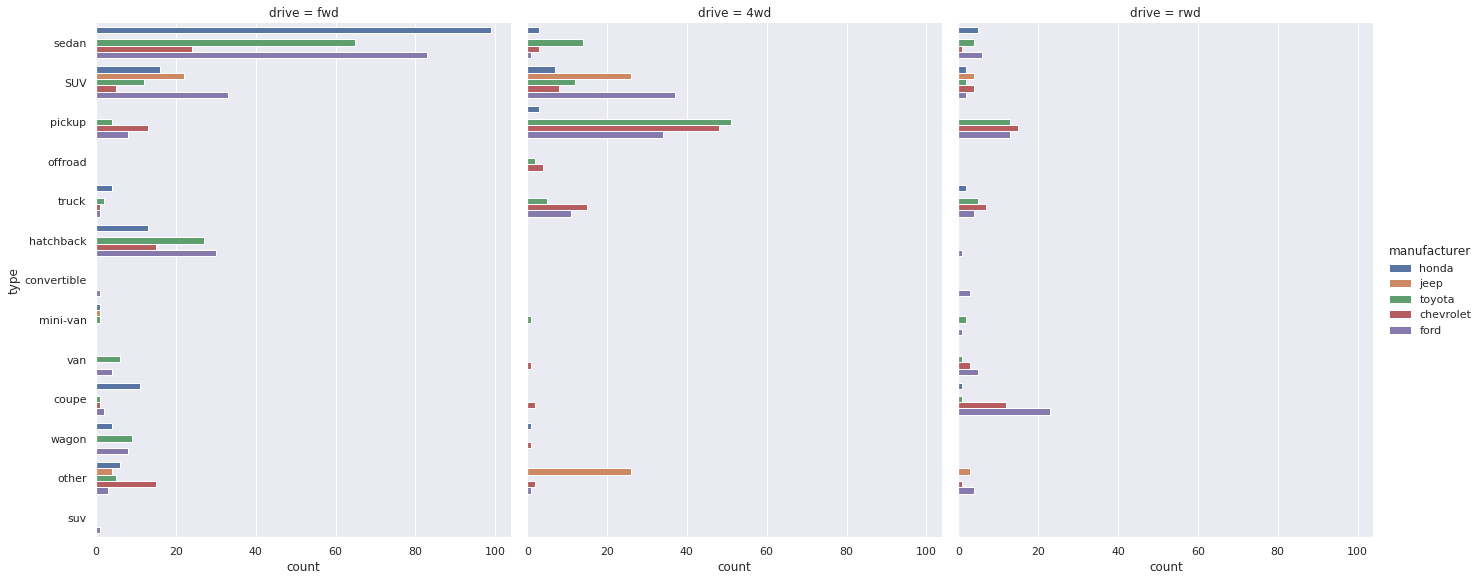

In [ ]:
g = sns.catplot(y="type", hue="manufacturer", col="drive", data=vehicles_ca_2017, kind="count", height=8, aspect=.8)

If you want a 4wd car that is a pickup you can easily get from toyota or chevrolet.

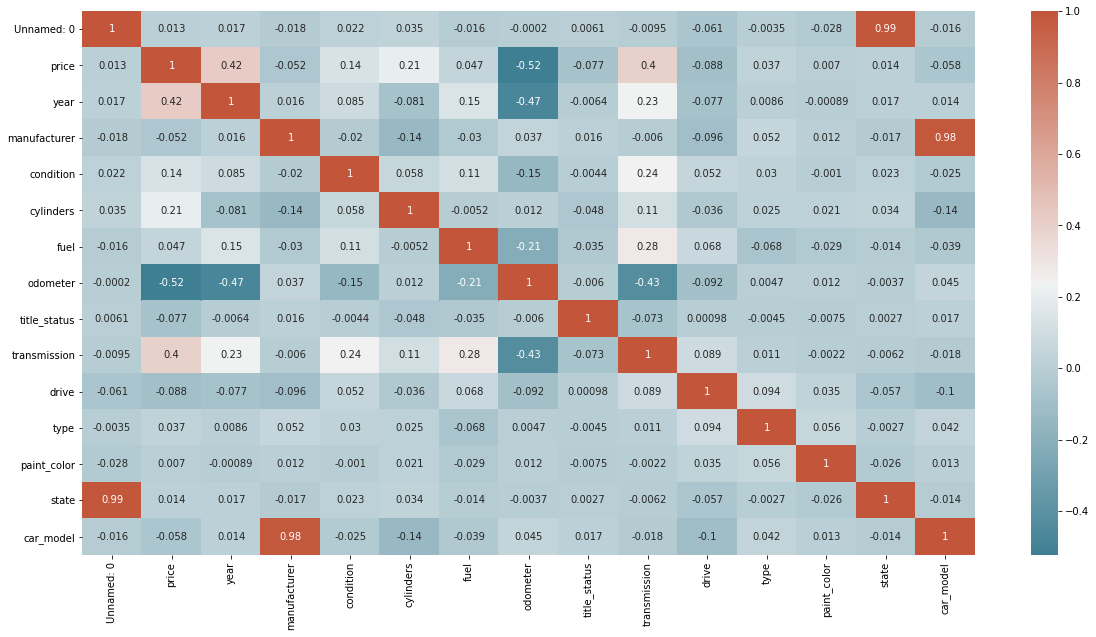

In [ ]:
# calculate correlation matrix
fig, ax = plt.subplots(figsize=(20,10))  
corr = df_new.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

 we can see that the year is positively correlated with price and odometer is negatively correlated with price — this makes sense! Looks like we’re on the right track.

In [ ]:

#Using Label Encoder to convert categorical values to numbers
le = LabelEncoder()


In [ ]:
#converting
df_new[['manufacturer', 'car_model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df_new[['manufacturer', 'car_model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

In [ ]:
# converting the dataframe to a csv file and saving to drive
df_new.to_csv('/content/gdrive/MyDrive/Colab Notebooks/new_vehicle.csv')

The reason for saving the cleaned dataset to drive is to conserve the ram space on colab, so it will be possible to utilize different runtime sessions.

###MODELLING THE DATA

####Using all the columns except price as the independent features

In [ ]:
# reading the dataset from the csv file in the drive
df_new = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/new_vehicle.csv')

In [ ]:
# selecting features, X
X = df_new.iloc[:, :-1].values
# selecting labels, y
y = df_new.iloc[:, -1].values

In [ ]:
# normalize the data
X = StandardScaler().fit_transform(X.astype(float))

In [ ]:
# to split the data
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (209645, 14) (209645,)
Test set:  (52412, 14) (52412,)


####Linear Regression

In [ ]:
# to create the linear reg model
reg = LinearRegression()
reg.fit(X_train, y_train)  # fit the model to train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# to evaluate test set values
y_pred = reg.predict(X_test)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred), 3))

Mean Absolute Error:  12.225
Mean Squared Error:  210.006
Root Mean Squared Error:  14.492
R2 score:  0.966


###Decision Trees

In [ ]:
# create and fit the model to the train data
r = DecisionTreeRegressor(random_state=42, max_depth=15)
r.fit(X_train, y_train.ravel())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
# to evaluate test set values
y_predDT = r.predict(X_test)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  1.557
Mean Squared Error:  9.426
Root Mean Squared Error:  3.07
R2 score:  0.998


####Random Forest

In [ ]:
r = RandomForestRegressor(n_estimators=150, random_state=42)
r.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predRF = r.predict(X_test)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  1.179
Mean Squared Error:  6.195
Root Mean Squared Error:  2.489
R2 score:  0.999


###Extra Trees

In [ ]:
r = ExtraTreesRegressor(n_estimators=400, random_state=42)
r.fit(X_train, y_train.ravel())

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=400, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predET = r.predict(X_test)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predET), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predET), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predET)), 3))
print('R2 score: ', round(r2_score(y_test, y_predET), 3))

Mean Absolute Error:  1.15
Mean Squared Error:  6.143
Root Mean Squared Error:  2.478
R2 score:  0.999


###CAT BOOST REGRESSOR

In [ ]:
# to find the best parameters for catboost
from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor()
parameters = {'depth'         : [6,8,10,12,14,16,18,20],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
              'iterations'    : [30, 50, 100]
              }
grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 40.1044394	total: 143ms	remaining: 14.2s
1:	learn: 21.3172131	total: 222ms	remaining: 10.9s
2:	learn: 11.9747260	total: 300ms	remaining: 9.7s
3:	learn: 7.4003804	total: 384ms	remaining: 9.22s
4:	learn: 5.6223142	total: 463ms	remaining: 8.8s
5:	learn: 4.9243507	total: 542ms	remaining: 8.48s
6:	learn: 4.5872779	total: 623ms	remaining: 8.27s
7:	learn: 4.3889919	total: 702ms	remaining: 8.07s
8:	learn: 4.1269647	total: 780ms	remaining: 7.88s
9:	learn: 4.0279858	total: 862ms	remaining: 7.76s
10:	learn: 3.9624992	total: 939ms	remaining: 7.6s
11:	learn: 3.8718695	total: 1.02s	remaining: 7.52s
12:	learn: 3.8088574	total: 1.12s	remaining: 7.49s
13:	learn: 3.7664681	total: 1.2s	remaining: 7.34s
14:	learn: 3.7289911	total: 1.27s	remaining: 7.21s
15:	learn: 3.6994013	total: 1.35s	remaining: 7.11s
16:	learn: 3.6497525	total: 1.43s	remaining: 6.99s
17:	learn: 3.6150382	total: 1.51s	remaining: 6.87s
18:	learn: 3.5704224	total: 1.59s	remaining: 6.79s
19:	learn: 3.5489473	total: 1.67s	remainin

In [ ]:
# using the best parameters gotten above
r = CatBoostRegressor(depth=10, iterations=100, learning_rate=0.5, random_state=42)
r.fit(X_train, y_train.ravel())

0:	learn: 40.2555544	total: 84ms	remaining: 8.32s
1:	learn: 21.3179726	total: 164ms	remaining: 8.02s
2:	learn: 11.5806501	total: 243ms	remaining: 7.86s
3:	learn: 7.2648200	total: 328ms	remaining: 7.86s
4:	learn: 5.4416581	total: 416ms	remaining: 7.9s
5:	learn: 4.8206867	total: 505ms	remaining: 7.92s
6:	learn: 4.4699404	total: 588ms	remaining: 7.81s
7:	learn: 4.2629750	total: 671ms	remaining: 7.71s
8:	learn: 4.1275369	total: 752ms	remaining: 7.6s
9:	learn: 4.0290979	total: 835ms	remaining: 7.51s
10:	learn: 3.9187321	total: 917ms	remaining: 7.42s
11:	learn: 3.8582130	total: 1s	remaining: 7.36s
12:	learn: 3.8022956	total: 1.09s	remaining: 7.3s
13:	learn: 3.7646665	total: 1.18s	remaining: 7.23s
14:	learn: 3.7017927	total: 1.26s	remaining: 7.14s
15:	learn: 3.6627850	total: 1.34s	remaining: 7.04s
16:	learn: 3.6383876	total: 1.42s	remaining: 6.95s
17:	learn: 3.5858750	total: 1.51s	remaining: 6.89s
18:	learn: 3.5679278	total: 1.6s	remaining: 6.82s
19:	learn: 3.5543515	total: 1.68s	remaining: 6

In [ ]:
y_predCAT = r.predict(X_test)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predCAT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predCAT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predCAT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predCAT), 3))

Mean Absolute Error:  1.939
Mean Squared Error:  9.05
Root Mean Squared Error:  3.008
R2 score:  0.999


###LGBM Regressor

In [ ]:
r = LGBMRegressor(n_estimators=150, random_state=42)
r.fit(X_train, y_train.ravel())

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_predLGBM = r.predict(X_test)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predLGBM), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predLGBM), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predLGBM)), 3))
print('R2 score: ', round(r2_score(y_test, y_predLGBM), 3))

Mean Absolute Error:  2.173
Mean Squared Error:  10.342
Root Mean Squared Error:  3.216
R2 score:  0.998


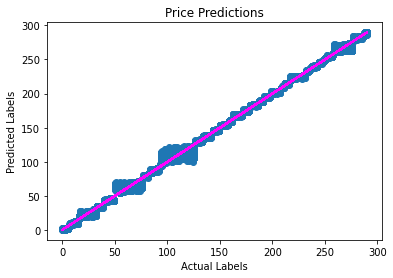

In [27]:
# Plot predicted vs actual
plt.scatter(y_test, y_predLGBM)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predLGBM, 3)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

###XGB REGRESSOR

In [ ]:
r = XGBRegressor(n_estimators=150, random_state=42)
r.fit(X_train, y_train.ravel())

[13:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_predXGB = r.predict(X_test)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGB), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGB), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGB)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGB), 3))

Mean Absolute Error:  3.009
Mean Squared Error:  15.874
Root Mean Squared Error:  3.984
R2 score:  0.997


###XGBRF Regressor


In [ ]:
r = XGBRFRegressor(n_estimators=150, random_state=42)
r.fit(X_train, y_train.ravel())

[13:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_predXGBRF = r.predict(X_test)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGBRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGBRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGBRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGBRF), 3))

Mean Absolute Error:  9.56
Mean Squared Error:  149.89
Root Mean Squared Error:  12.243
R2 score:  0.976


Extratrees and random forest algorithm performed very well on our data.